## Triangulation
Figure in the paper with the triangulation of different domains

In [ ]:
import matplotlib.pyplot as plt
from src.triangulations import *
import os

## config
# plt.style.use('seaborn-v0_8-dark-palette')
plt.rcParams.update({
        'text.usetex': True,
        'font.family': 'serif',
    })
ROOT = os.environ.get('ROOT', '')
SAVE = bool(os.environ.get('SAVE', False))

#### 2D Shapes

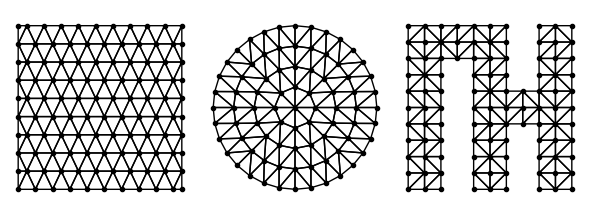

In [ ]:
## triangulations
sq_pts, sq_tris = tri_rectangle(1, 1, 10)
cir_pts, cir_tris = tri_circle(1, 5)
mz_pts, mz_tris = tri_maze(3, 3, 0.2, 10, seed=10)

## plot it
# setup
fig, axs = plt.subplots(1, 3)
fig.set_figwidth(6)
fig.set_figheight(2.25)
for ax in axs:
    ax.set_axis_off()
    ax.axis('equal')

# plot the square
axs[0].plot(sq_pts[:, 0], sq_pts[:, 1], 'k.')
for t in sq_tris:
    t = t[[0, 1, 2, 0]]
    axs[0].plot(sq_pts[t, 0], sq_pts[t, 1], 'k-', linewidth=1)

# plot the cirle
axs[1].plot(cir_pts[:, 0], cir_pts[:, 1], 'k.')
for t in cir_tris:
    t = t[[0, 1, 2, 0]]
    axs[1].plot(cir_pts[t, 0], cir_pts[t, 1], 'k-', linewidth=1)

# plot the maze
axs[2].plot(mz_pts[:, 0], mz_pts[:, 1], 'k.')
for t in mz_tris:
    t = t[[0, 1, 2, 0]]
    axs[2].plot(mz_pts[t, 0], mz_pts[t, 1], 'k-', linewidth=1)

# final things
fig.tight_layout()
if SAVE: fig.savefig(ROOT + 'paper/figures/2dtris.pdf', bbox_inches='tight')

## 3D Shapes

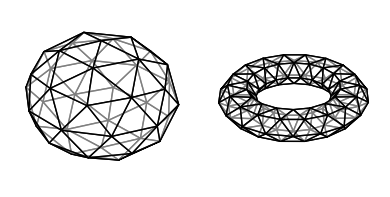

In [ ]:
## triangulations
sph_pts, sph_tris = tri_sphere(1, 1)
tor_pts, tor_tris = tri_torus(1, 3, 6)

## plot it
# setup
fig, axs = plt.subplots(1, 2, subplot_kw={'projection': '3d'})
fig.set_figwidth(4)
fig.set_figheight(2.25)
for ax in axs:
    ax.set_axis_off()
    ax.axis('equal')

# plot the sphere
axs[0].plot_trisurf(
        sph_pts[:, 0],
        sph_pts[:, 1],
        sph_pts[:, 2],
        triangles=sph_tris,
        facecolor=[1, 1, 1, 0.5],
        edgecolor='k'
    )
axs[0].set_xlim([x / 1.5 for x in axs[0].get_xlim()])
axs[0].set_ylim([x / 1.5 for x in axs[0].get_ylim()])
axs[0].set_zlim([x / 1.5 for x in axs[0].get_zlim()])

# plot the torus
axs[1].plot_trisurf(
        tor_pts[:, 0],
        tor_pts[:, 1],
        tor_pts[:, 2],
        triangles=tor_tris,
        facecolor=[1, 1, 1, 0.5],
        edgecolor='k'
    )
axs[1].set_xlim([x / 1.5 for x in axs[1].get_xlim()])
axs[1].set_ylim([x / 1.5 for x in axs[1].get_ylim()])
axs[1].set_zlim(axs[1].get_xlim())

# final things
fig.tight_layout()
if SAVE: fig.savefig(ROOT + 'paper/figures/3dtris.pdf', bbox_inches='tight')

#### Psi

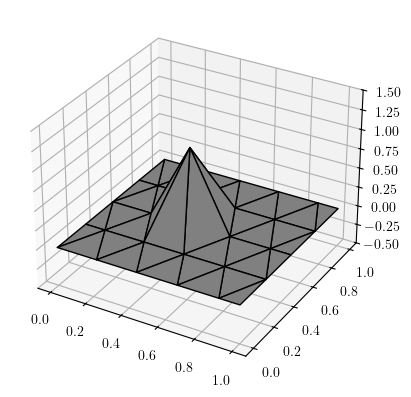

In [ ]:
## triangulations
sq_pts, sq_tris = tri_rectangle(1, 1, 5)
j = np.sum((sq_pts - np.array([0.5, 0.5]))**2, axis=-1).argmin()  # this is 1
z = np.zeros_like(sq_pts[:, 1])
z[j] = 1

## plot it
# setup
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
fig.set_figwidth(4)
fig.set_figheight(4)

# plot the sphere
ax.plot_trisurf(
        sq_pts[:, 0],
        sq_pts[:, 1],
        z,
        triangles=sq_tris,
        facecolor='gray',
        edgecolor='k',
    )
ax.set_zlim((-0.5, 1.5))

# final things
fig.tight_layout()
if SAVE: fig.savefig(ROOT + 'paper/figures/psi.pdf', bbox_inches='tight')